In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import openpyxl as xl

In [3]:
wb = xl.load_workbook('coefficient.xlsx')
sheet = wb['Sheet1']
sheet['m2'].value = 'Path Loss(blood)'
wb.save('coefficient.xlsx')

## Assume the distance variable, d = 10 mm
## Determine the Path loss, P(f,d) = ((4*pi*f*n*d)/c)^2 * e^(a(f)*d)

In [4]:
c = 3 * 10**8
def path_loss(frequency, abs_coeff, ref_indx, distance):
    loss_spread = np.square((4*np.pi*frequency*ref_indx*distance)/(c*10**3))
    loss_abs = np.exp(abs_coeff * distance)
    pa_loss = loss_spread * loss_abs
    return pa_loss

for i in range(3, sheet.max_row+1):
    frequency = sheet.cell(i, 1).value
    abs_coeff = sheet.cell(i, 9).value
    ref_indx = sheet.cell(i, 2).value
    distance = 1 / abs_coeff
    print(path_loss(frequency, abs_coeff, ref_indx, distance))
    updated_data = sheet.cell(i, 13)
    updated_data.value = path_loss(frequency, abs_coeff, ref_indx, distance)
wb.save('coefficient.xlsx')

1.010987541479509e-23
1.4526136116065513e-23
2.0540499370193462e-23
2.6587813696214366e-23
3.2108755039753886e-23
3.704728723191401e-23
4.1559989771789305e-23
4.5842447571190506e-23
5.0081231287620804e-23
5.440422510427106e-23


In [5]:
df = pd.read_excel('coefficient.xlsx')
df

,Unnamed: 0,blood,skin,Fat,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,blood.1,skin.1,Fat.1,Unnamed: 11,Unnamed: 12
0,Frequency(THz),refractive index,NaN,NaN,NaN,NaN,NaN,Frequency(THz),absorption coefficient(mm^-1),NaN,NaN,NaN,Path Loss(blood)
1,0.2,2.7108,2.487803,2.0305,NaN,NaN,NaN,0.2,11.7758,7.240005,4.0489,NaN,1.01099e-23
2,0.4,2.2105,2.246139,1.9319,NaN,NaN,NaN,0.4,16.0218,9.490481,5.8964,NaN,1.45261e-23
3,0.6,2.0427,2.165657,1.8659,NaN,NaN,NaN,0.6,18.6761,11.736955,8.0317,NaN,2.05405e-23
4,0.8,1.9573,2.111387,1.8101,NaN,NaN,NaN,0.8,20.9721,14.240531,10.0315,NaN,2.65878e-23
5,1,1.9013,2.065012,1.7649,NaN,NaN,NaN,1,23.1726,16.846053,11.7077,NaN,3.21088e-23
6,1.2,1.8588,2.023375,1.7295,NaN,NaN,NaN,1.2,25.3088,19.394905,13.0432,NaN,3.70473e-23
7,1.4,1.8239,1.986050,1.7021,NaN,NaN,NaN,1.4,27.3544,21.781510,14.0876,NaN,4.156e-23
8,1.6,1.794,1.952969,1.6809,NaN,NaN,NaN,1.6,29.2782,23.951465,14.8994,NaN,4.58424e-23
9,1.8,1.7681,1.923947,1.6644,NaN,NaN,NaN,1.8,31.0583,25.887087,15.5355,NaN,5.00812e-23


# Linear Regression ML algorithm Class

variance(R^2):  0.8552710692517858
intercept:  7.197356200529476e-23
slope:  [-8.325796e-22]
[1.27096852e-24 2.00081399e-23 2.73936122e-23 3.22741709e-23
 3.60440763e-23 3.90767198e-23 4.15367913e-23 4.35367182e-23
 4.51665700e-23 4.65004936e-23]


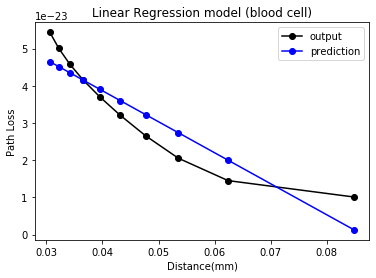

In [6]:
class ML_algo:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def train_data(self):
        model = LinearRegression().fit(self.x, self.y)
        variance = model.score(self.x, self.y)
        print("variance(R^2): ",variance)
        print("intercept: ", model.intercept_)
        print("slope: ", model.coef_)
        y_prediction = model.predict(self.x)
        print(y_prediction)
        
        # plotting
        plt.plot(self.x, self.y, 'ko-', label='output' )
        plt.plot(self.x, y_prediction, 'bo-', label="prediction" )
        plt.xlabel('Distance(mm)')
        plt.ylabel('Path Loss')
        plt.title('Linear Regression model (blood cell)')
        plt.legend()
        plt.savefig('plot.png')
        #plt.show()
    
x = 1 / np.array(df.values[1:, 8], dtype='float').reshape(-1,1)
y = np.array(df.values[1:, 12])
ML_algo(x, y).train_data()

# Normal Equation

In [7]:
x_one = np.ones((10,1), dtype='float')
x = np.reshape(x, (10,1))
up_x = np.append(x_one, x, axis=1)
up_x

array([[1.        , 0.08491992],
       [1.        , 0.06241496],
       [1.        , 0.05354437],
       [1.        , 0.0476824 ],
       [1.        , 0.04315442],
       [1.        , 0.03951195],
       [1.        , 0.03655719],
       [1.        , 0.03415511],
       [1.        , 0.03219751],
       [1.        , 0.03059536]])

In [8]:
x_trans = np.transpose(up_x)
xT_dot_x = x_trans.dot(up_x)
temp_1 = np.linalg.inv(xT_dot_x)
temp_2 = x_trans.dot(y)
theta = temp_1.dot(temp_2)
theta

array([7.197356200529461e-23, -8.325796004105857e-22], dtype=object)

# Plotting and analysis the prediction with new theta value

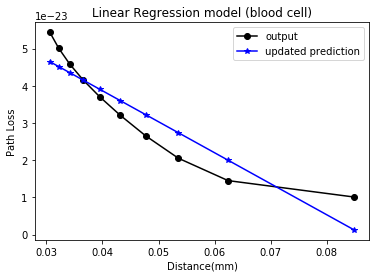

In [10]:
y_new_predict = theta[0] + theta[1] * x
plt.plot(x, y, 'ko-', label='output' )
plt.plot(x, y_new_predict, 'b*-', label="updated prediction" )
plt.xlabel('Distance(mm)')
plt.ylabel('Path Loss')
plt.title('Linear Regression model (blood cell)')
plt.legend()
plt.savefig('new_plot.png')
#plt.show()